In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('Datasets/linear_data.csv')
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [14]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


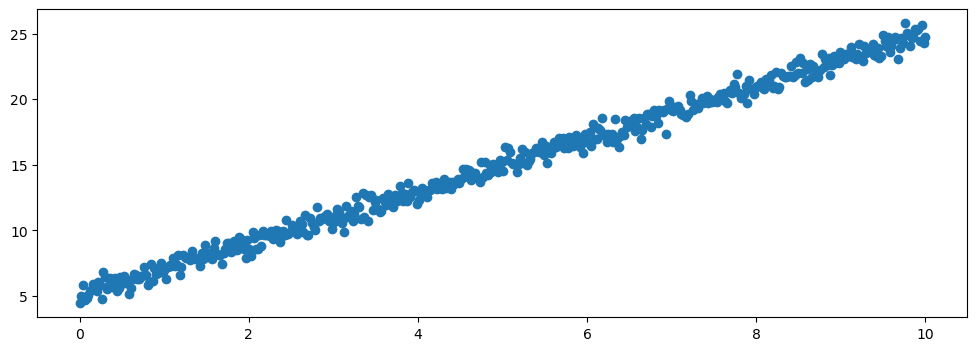

In [15]:
plt.figure(figsize=(12, 4))
plt.scatter(df[['x']], df['y'])

In [17]:
df2 = pd.read_csv('Datasets/nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [18]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


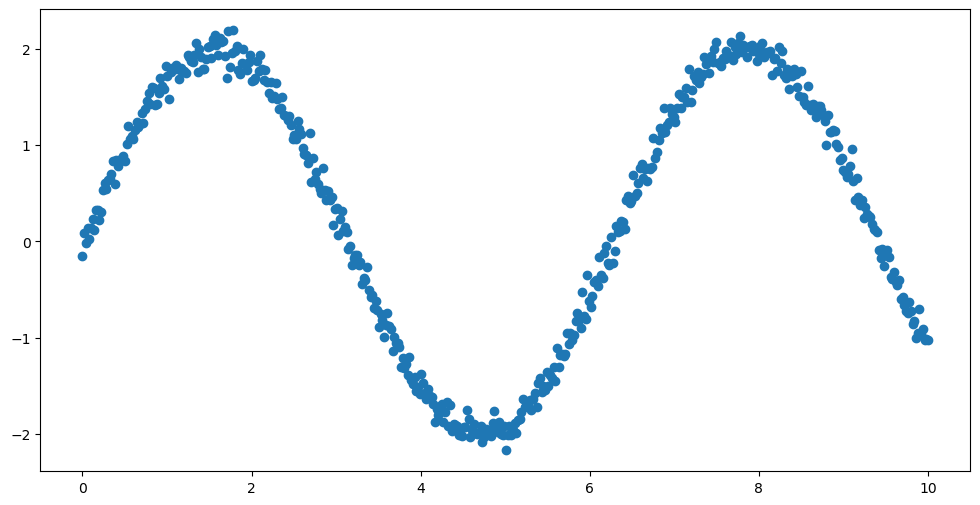

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(df2[['x']], df2['y'])

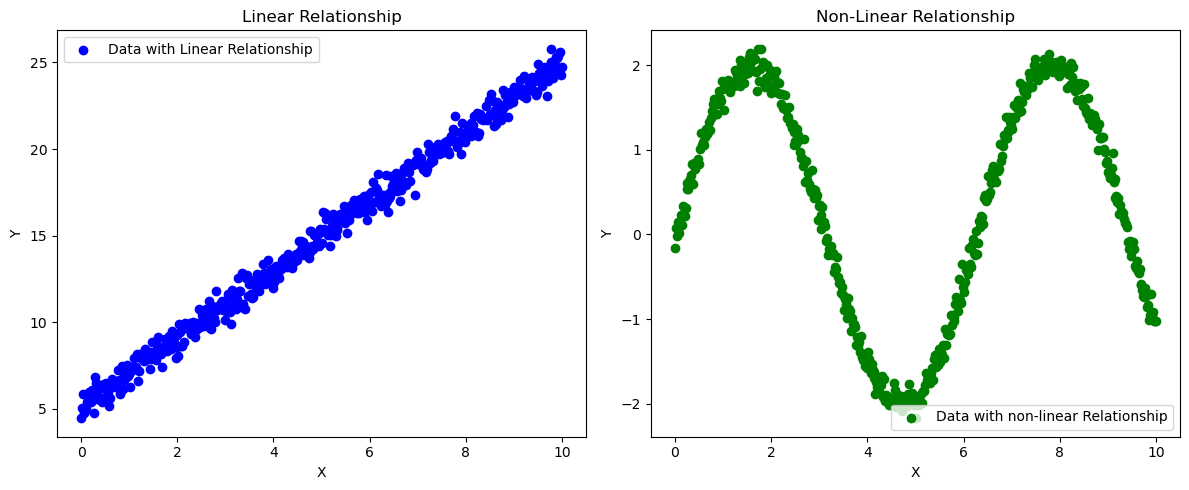

In [20]:
#Linear
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df[['x']], df['y'], color='blue', label='Data with Linear Relationship')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Relationship")
plt.legend()

#non linear
plt.subplot(1, 2, 2)
plt.scatter(df2[['x']], df2['y'], color='green', label='Data with non-linear Relationship')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-Linear Relationship")
plt.legend()

plt.tight_layout() #adjust the subplot to fit into the figure area properly
plt.show()

Correlation Coefficient

In [21]:
correlation_linear = np.corrcoef(df['x'], df['y'])
print("Correlation coefficient for linear relationship:",correlation_linear)

Correlation coefficient for linear relationship: [[1.         0.99643985]
 [0.99643985 1.        ]]


In [22]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [23]:
correlation_nonlinear = np.corrcoef(df2['x'], df2['y'])
print("Correlation Coefficient for non linear relationship:",correlation_nonlinear)

Correlation Coefficient for non linear relationship: [[ 1.         -0.06573583]
 [-0.06573583  1.        ]]


In [24]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


#Linear

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [30]:
reg1 = LinearRegression()

In [31]:
reg1.fit(df[['x']], df['y'])

LinearRegression()

In [32]:
reg1.score(df[['x']], df['y'])

0.9928923730526016

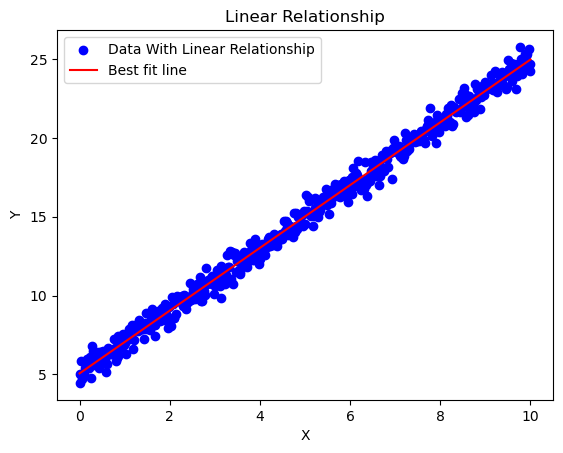

In [33]:
plt.scatter(df['x'], df['y'], color='blue', label='Data With Linear Relationship')
plt.plot(df['x'], reg1.predict(df[['x']]), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel("Y")
plt.title("Linear Relationship")
plt.legend()

Non Linear Data df2

In [34]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [35]:
reg2 = LinearRegression()

In [36]:
reg2.fit(df2[['x']], df2['y'])

LinearRegression()

In [37]:
reg2.score(df2[['x']], df2['y'])

0.004321199719043656

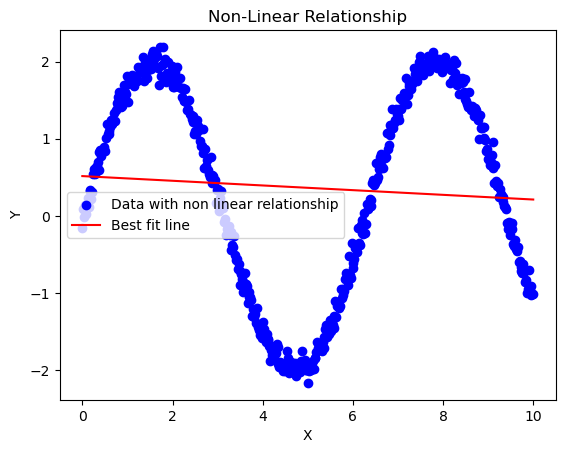

In [38]:
plt.scatter(df2['x'], df2['y'], color='blue', label='Data with non linear relationship')
plt.plot(df2[['x']], reg2.predict(df[['x']]), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Relationship')
plt.legend()

<h3>Polynomial Regression</h3>

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(df2[['x']])

In [41]:
x_poly.shape

(500, 5)

In [42]:
pd.DataFrame(x_poly)

,0,1,2,3,4
0,1.0,0.00000,0.000000,0.000000,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07
2,1.0,0.04008,0.001606,0.000064,2.580583e-06
3,1.0,0.06012,0.003614,0.000217,1.306420e-05
4,1.0,0.08016,0.006426,0.000515,4.128932e-05
...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03
496,1.0,9.93988,98.801210,982.072144,9.761679e+03
497,1.0,9.95992,99.200003,988.024080,9.840641e+03
498,1.0,9.97996,99.599600,994.000016,9.920080e+03


In [43]:
reg_poly = LinearRegression()

In [44]:
reg_poly.fit(x_poly, df2['y'])

LinearRegression()

In [45]:
reg_poly.score(x_poly, df2['y'])

0.9067596910369461

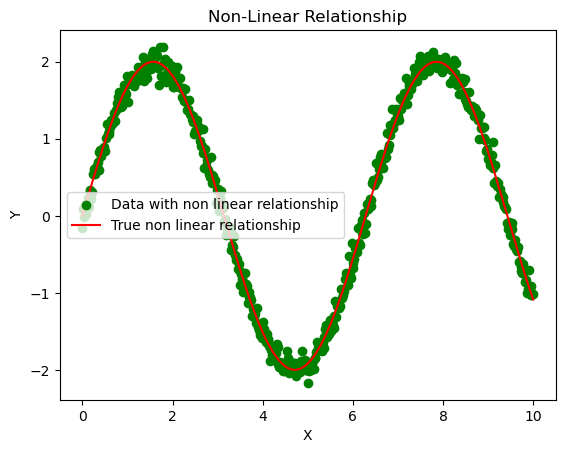

In [46]:
plt.scatter(df2['x'], df2['y'], color='green', label='Data with non linear relationship')
plt.plot(df2['x'], 2 * np.sin(df2['x']), color='red', label='True non linear relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Relationship')
plt.legend()

Testing Overfit or Bestfit

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, df['y'], test_size=0.2, random_state=42)

In [49]:
X_train.shape

(400, 5)

In [50]:
reg_poly.fit(X_train, y_train)

LinearRegression()

In [51]:
reg_poly.score(X_train, y_train) #Training Accuracy

0.9925027568128868

In [52]:
reg_poly.score(X_test, y_test) #Unseen data ->Teting Accuracy

0.9941833409456491